In [1]:
from sqlalchemy.orm import declarative_base,sessionmaker,relationship
import pandas
from sqlalchemy import Column,Integer,ForeignKey,String,DateTime,Float,create_engine
from config.config import config
import pandas as pd






engine = create_engine(config.database_url)
Base = declarative_base()
Session = sessionmaker(bind=engine)
session = Session()



class AnnonceEquipement(Base):
    __tablename__ = 'annonce_equipement'
    
    annonce_id = Column(Integer, ForeignKey('annonces.id'), primary_key=True)
    equipement_id = Column(Integer, ForeignKey('equipements.id'), primary_key=True)
    
    annonce = relationship("Annonce", back_populates="equipements")
    equipement = relationship("Equipement", back_populates="annonces")

class Annonce(Base):
    __tablename__ = 'annonces'
    
    id = Column(Integer, primary_key=True)
    title = Column(String)
    price = Column(String)  
    datetime = Column(DateTime, nullable=False)
    nb_rooms = Column(Integer)
    nb_baths = Column(Integer)
    surface_area = Column(Float)
    link = Column(String)
    city_id = Column(Integer, ForeignKey('villes.id'), nullable=False)
    
    ville = relationship("Ville", back_populates="annonces")
    equipements = relationship("AnnonceEquipement", back_populates="annonce")

class Ville(Base):
    __tablename__ = 'villes'
    
    id = Column(Integer, primary_key=True)
    name = Column(String)
    
    annonces = relationship("Annonce", back_populates="ville")

class Equipement(Base):
    __tablename__ = 'equipements'
    
    id = Column(Integer, primary_key=True)
    name = Column(String)
    
    annonces = relationship("AnnonceEquipement", back_populates="equipement")



result = session.query(Annonce,Ville,Equipement,AnnonceEquipement).join(Ville).join(AnnonceEquipement).join(Equipement).all()


#print(result)

data=[]
for obj in result:
    
    annonce,ville,equipement,aq = obj

    row = {
        config.column_annonce[0]:annonce.id,
        config.column_annonce[2]:annonce.title,
        config.column_annonce[1]:annonce.price,
        config.column_annonce[3]:annonce.datetime,
        config.column_annonce[4]:annonce.nb_rooms,
        config.column_annonce[5]:annonce.nb_baths,
        config.column_annonce[6]:annonce.surface_area,
        config.column_annonce[7]:annonce.city_id,
        config.column_ville[1]:ville.name,
        config.column_equipement[1]:equipement.name
    }
    data.append(row)

df = pd.DataFrame(data)
display(df.head())

['price', 'nb rooms', 'nb baths', 'surface area']
['id', 'price', 'title', 'date time', 'nb rooms', 'nb baths', 'surface area', 'city id'] ['annonce id', 'equipement id'] ['id equipement', 'equipement'] ['id ville', 'ville']


,id,title,price,date time,nb rooms,nb baths,surface area,city id,ville,equipement
0,1,Appartement à louer sur Souissi Orangeraie,11000,2024-07-19 14:51:18,1,1,70.0,1,Rabat,Balcon
1,1,Appartement à louer sur Souissi Orangeraie,11000,2024-07-19 14:51:18,1,1,70.0,1,Rabat,Cuisine Équipée
2,1,Appartement à louer sur Souissi Orangeraie,11000,2024-07-19 14:51:18,1,1,70.0,1,Rabat,Meublé
3,1,Appartement à louer sur Souissi Orangeraie,11000,2024-07-19 14:51:18,1,1,70.0,1,Rabat,Sécurité
4,2,Appartement meublé à louer sur l'Agdal,9500,2024-05-04 04:00:29,2,2,100.0,1,Rabat,Ascenseur


In [2]:
df.columns.to_list()

['id',
 'title',
 'price',
 'date time',
 'nb rooms',
 'nb baths',
 'surface area',
 'city id',
 'ville',
 'equipement']

In [3]:
df['price']=pd.to_numeric(df['price'])




In [4]:
display(df.info())
display(df['price'].isnull().sum())
display(df['id'].count)
df['jour']=df['date time'].dt.hour
df['month']=df['date time'].dt.month
df['year']=df['date time'].dt.year
df.drop('date time',axis=1,inplace=True)
display(df)
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            10180 non-null  int64         
 1   title         10180 non-null  object        
 2   price         10180 non-null  int64         
 3   date time     10180 non-null  datetime64[ns]
 4   nb rooms      10180 non-null  int64         
 5   nb baths      10180 non-null  int64         
 6   surface area  10180 non-null  float64       
 7   city id       10180 non-null  int64         
 8   ville         10180 non-null  object        
 9   equipement    10180 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 795.4+ KB


None

np.int64(0)

<bound method Series.count of 0           1
1           1
2           1
3           1
4           2
         ... 
10175    1305
10176    1305
10177    1305
10178    1305
10179    1305
Name: id, Length: 10180, dtype: int64>

,id,title,price,nb rooms,nb baths,surface area,city id,ville,equipement,jour,month,year
0,1,Appartement à louer sur Souissi Orangeraie,11000,1,1,70.0,1,Rabat,Balcon,14,7,2024
1,1,Appartement à louer sur Souissi Orangeraie,11000,1,1,70.0,1,Rabat,Cuisine Équipée,14,7,2024
2,1,Appartement à louer sur Souissi Orangeraie,11000,1,1,70.0,1,Rabat,Meublé,14,7,2024
3,1,Appartement à louer sur Souissi Orangeraie,11000,1,1,70.0,1,Rabat,Sécurité,14,7,2024
4,2,Appartement meublé à louer sur l'Agdal,9500,2,2,100.0,1,Rabat,Ascenseur,4,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
10175,1305,Appartement spacieux 151 m² à vendre,690000,3,2,151.0,2,Fès,Cuisine Équipée,9,3,2024
10176,1305,Appartement spacieux 151 m² à vendre,690000,3,2,151.0,2,Fès,Machine À Laver,9,3,2024
10177,1305,Appartement spacieux 151 m² à vendre,690000,3,2,151.0,2,Fès,Meublé,9,3,2024
10178,1305,Appartement spacieux 151 m² à vendre,690000,3,2,151.0,2,Fès,Sécurité,9,3,2024


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10180 entries, 0 to 10179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10180 non-null  int64  
 1   title         10180 non-null  object 
 2   price         10180 non-null  int64  
 3   nb rooms      10180 non-null  int64  
 4   nb baths      10180 non-null  int64  
 5   surface area  10180 non-null  float64
 6   city id       10180 non-null  int64  
 7   ville         10180 non-null  object 
 8   equipement    10180 non-null  object 
 9   jour          10180 non-null  int32  
 10  month         10180 non-null  int32  
 11  year          10180 non-null  int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 835.2+ KB


None

In [5]:
def agg_remove(group):
    if len(group['id']) != 1:
        group['equipement']=','.join(group['equipement'])
        return group.drop_duplicates()
    
    return group    



df = df.groupby('id').apply(agg_remove).reset_index(drop=True)
print(df.info())
display(df)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1305 non-null   int64  
 1   title         1305 non-null   object 
 2   price         1305 non-null   int64  
 3   nb rooms      1305 non-null   int64  
 4   nb baths      1305 non-null   int64  
 5   surface area  1305 non-null   float64
 6   city id       1305 non-null   int64  
 7   ville         1305 non-null   object 
 8   equipement    1305 non-null   object 
 9   jour          1305 non-null   int32  
 10  month         1305 non-null   int32  
 11  year          1305 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 107.2+ KB
None


/tmp/ipykernel_27256/2116685190.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('id').apply(agg_remove).reset_index(drop=True)


,id,title,price,nb rooms,nb baths,surface area,city id,ville,equipement,jour,month,year
0,1,Appartement à louer sur Souissi Orangeraie,11000,1,1,70.0,1,Rabat,"Balcon,Cuisine Équipée,Meublé,Sécurité",14,7,2024
1,2,Appartement meublé à louer sur l'Agdal,9500,2,2,100.0,1,Rabat,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",4,5,2024
2,3,appartement a louer par jour,300,5,2,99.0,2,Fès,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",1,8,2024
3,4,Appartement au Taghazout Bay,1128520,2,2,99.0,3,Taghazout,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",2,7,2024
4,5,Appartement de 112 m2 Agdal,250,2,2,99.0,2,Fès,"Ascenseur,Concierge,Cuisine Équipée,Meublé,Par...",15,6,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,Appart 3 chambres 3 SDB face ville verte ODYSSIA,1280000,3,3,132.0,5,Casablanca,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",23,1,2024
1301,1302,Appartement à vendre,1128520,2,2,89.0,5,Casablanca,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",17,10,2024
1302,1303,Appartement à vendre 63 m² à Marrakech,756000,2,2,63.0,4,Marrakech,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",11,7,2024
1303,1304,Appartement à vendre 97 m² à Dar Bouazza,2400000,2,2,97.0,24,Dar Bouazza,"Cuisine Équipée,Machine À Laver,Meublé,Parking...",20,3,2024


In [6]:
print(df['ville'].value_counts()[df['ville'].value_counts()==1].index.to_list())
list_to_remove=df['ville'].value_counts()[df['ville'].value_counts()==1].index.to_list()

['Abdelghaya Souahel', 'Benslimane', 'Ifrane', 'Taghazout', 'Mediouna', 'Fnideq', 'Zenata', 'Sidi Bouknadel', 'Khemisset', 'Ain Attig', 'Nador', 'Tamensourt', 'Al Hoceima', 'Biougra', 'Fquih Ben Saleh', 'El Kelâa des Sraghna', 'Larache', 'Guercif']


In [7]:
for ele in list_to_remove:
    df=df[df['ville']!= ele]
print(df.info())

print(df['ville'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1304
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1287 non-null   int64  
 1   title         1287 non-null   object 
 2   price         1287 non-null   int64  
 3   nb rooms      1287 non-null   int64  
 4   nb baths      1287 non-null   int64  
 5   surface area  1287 non-null   float64
 6   city id       1287 non-null   int64  
 7   ville         1287 non-null   object 
 8   equipement    1287 non-null   object 
 9   jour          1287 non-null   int32  
 10  month         1287 non-null   int32  
 11  year          1287 non-null   int32  
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 115.6+ KB
None
ville
Casablanca                428
Marrakech                 142
Tanger                    110
Agadir                     76
Rabat                      75
Temara                     61
Kénitra                    61
M

In [8]:
display(df)

,id,title,price,nb rooms,nb baths,surface area,city id,ville,equipement,jour,month,year
0,1,Appartement à louer sur Souissi Orangeraie,11000,1,1,70.0,1,Rabat,"Balcon,Cuisine Équipée,Meublé,Sécurité",14,7,2024
1,2,Appartement meublé à louer sur l'Agdal,9500,2,2,100.0,1,Rabat,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",4,5,2024
2,3,appartement a louer par jour,300,5,2,99.0,2,Fès,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",1,8,2024
4,5,Appartement de 112 m2 Agdal,250,2,2,99.0,2,Fès,"Ascenseur,Concierge,Cuisine Équipée,Meublé,Par...",15,6,2024
5,6,RAK-GU-1118 - Appartement à vendre à Issil,980000,3,2,115.0,4,Marrakech,"Articles De Toilettage,Ascenseur,Balcon,Chauff...",15,6,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,Appart 3 chambres 3 SDB face ville verte ODYSSIA,1280000,3,3,132.0,5,Casablanca,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",23,1,2024
1301,1302,Appartement à vendre,1128520,2,2,89.0,5,Casablanca,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",17,10,2024
1302,1303,Appartement à vendre 63 m² à Marrakech,756000,2,2,63.0,4,Marrakech,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",11,7,2024
1303,1304,Appartement à vendre 97 m² à Dar Bouazza,2400000,2,2,97.0,24,Dar Bouazza,"Cuisine Équipée,Machine À Laver,Meublé,Parking...",20,3,2024


here i cleane dthe data eggregated the equipements and remove row that the city is only for one row next is to normalization and standarization

In [9]:
df[config.operation_array].corr()


,price,nb rooms,nb baths,surface area
price,1.000000,0.149715,0.035722,0.232596
nb rooms,0.149715,1.000000,0.058160,0.162178
nb baths,0.035722,0.058160,1.000000,0.017966
surface area,0.232596,0.162178,0.017966,1.000000


In [10]:
df[config.operation_array].skew()


price            6.958723
nb rooms         2.215601
nb baths        20.770248
surface area    16.685874
dtype: float64

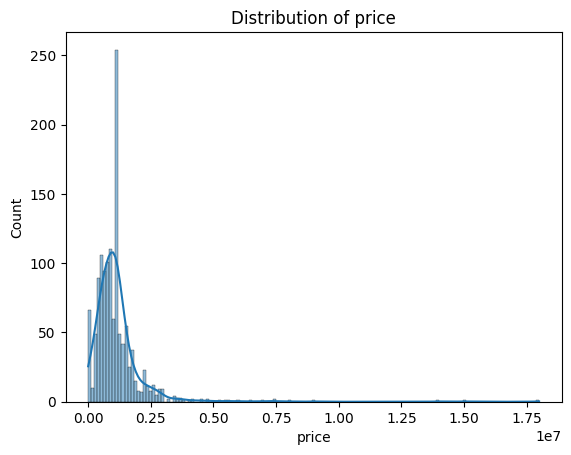

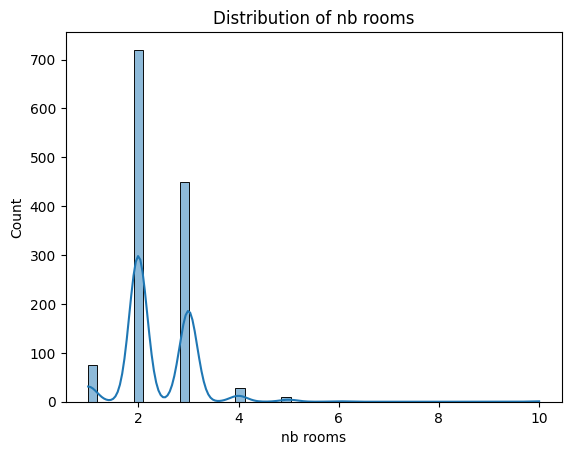

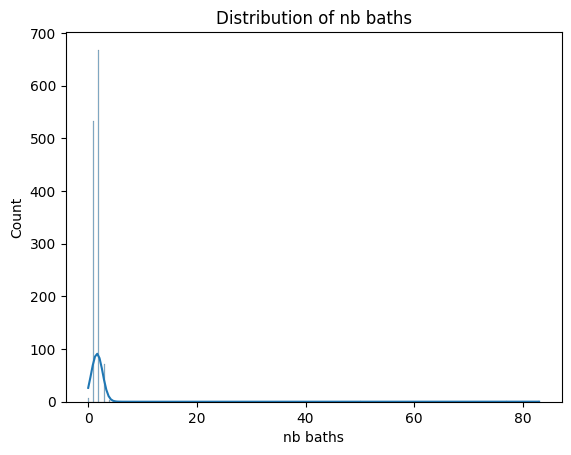

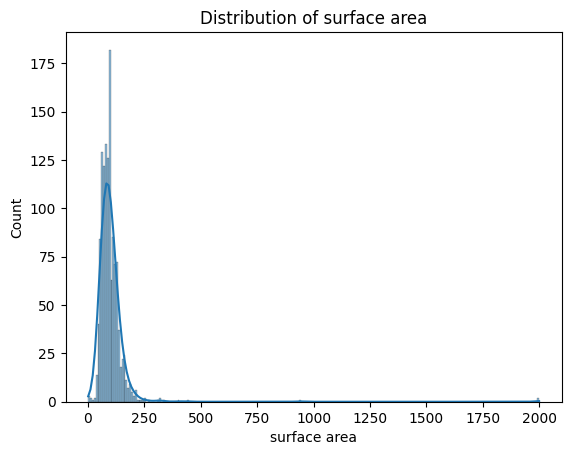

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in config.operation_array:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [12]:
display(df[config.operation_array].info())



<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1304
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1287 non-null   int64  
 1   nb rooms      1287 non-null   int64  
 2   nb baths      1287 non-null   int64  
 3   surface area  1287 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 50.3 KB


None

In [13]:
import numpy as np
for i in range(2):
    df[config.operation_array[i]]=np.sqrt(df[config.operation_array[i]])
for i in range(2,4):
    df[config.operation_array[i]]=np.log1p(df[config.operation_array[i]])



In [14]:
df[config.operation_array].corr()


,price,nb rooms,nb baths,surface area
price,1.000000,0.208683,0.244168,0.443694
nb rooms,0.208683,1.000000,0.329078,0.467476
nb baths,0.244168,0.329078,1.000000,0.346560
surface area,0.443694,0.467476,0.346560,1.000000


In [15]:
df[config.operation_array].skew()


price           1.299920
nb rooms        0.599484
nb baths        3.385024
surface area   -0.306390
dtype: float64

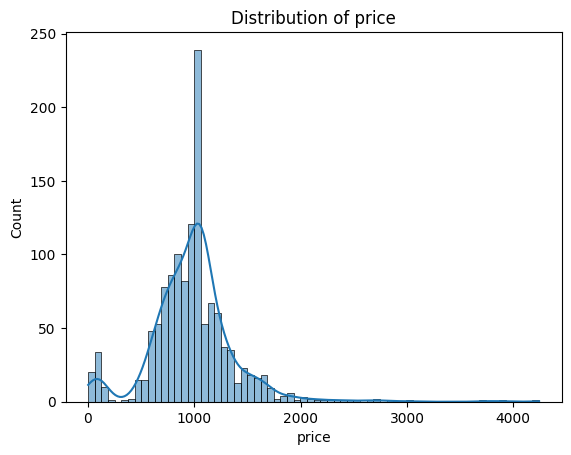

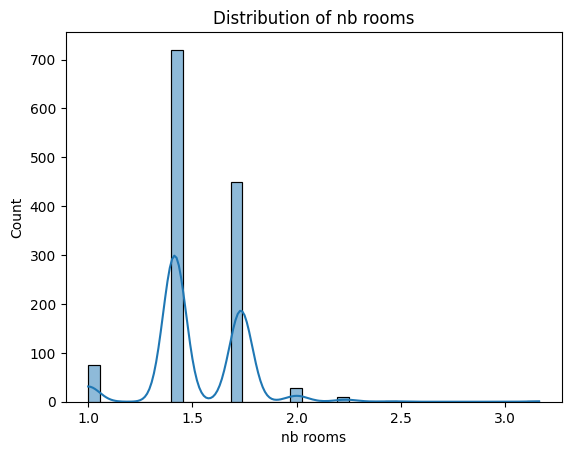

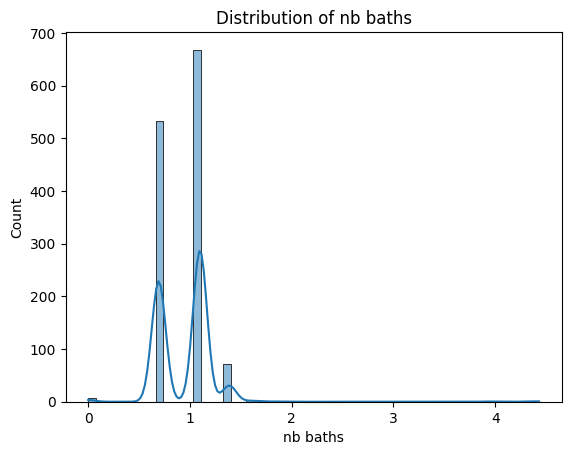

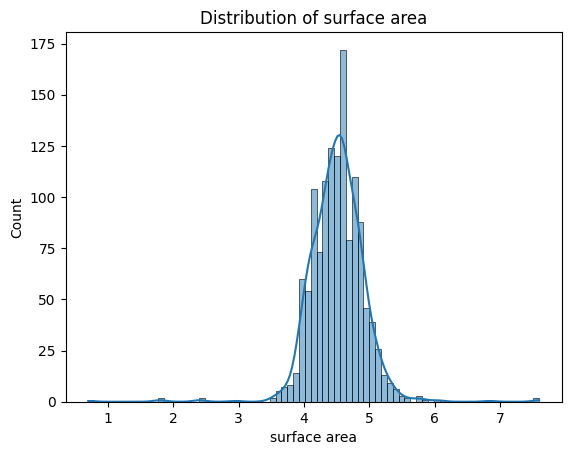

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in config.operation_array:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [17]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1304
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1287 non-null   int64  
 1   title         1287 non-null   object 
 2   price         1287 non-null   float64
 3   nb rooms      1287 non-null   float64
 4   nb baths      1287 non-null   float64
 5   surface area  1287 non-null   float64
 6   city id       1287 non-null   int64  
 7   ville         1287 non-null   object 
 8   equipement    1287 non-null   object 
 9   jour          1287 non-null   int32  
 10  month         1287 non-null   int32  
 11  year          1287 non-null   int32  
dtypes: float64(4), int32(3), int64(2), object(3)
memory usage: 115.6+ KB


None

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#thsi is before aplaying log and sqrt 
'''scaler = MinMaxScaler()

for i in range(4):
    if i == 1:
        continue
    df[config.operation_array[i]]=scaler.fit_transform(df[config.operation_array[i]])


scaler = StandardScaler()
df[config.operation_array[1]]=scaler.fit_transform(df[config.operation_array[1]])'''

scaler = StandardScaler()

for i in config.operation_array:
    df[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))


In [19]:
display(df)

,id,title,price,nb rooms,nb baths,surface area,city id,ville,equipement,jour,month,year
0,1,Appartement à louer sur Souissi Orangeraie,-2.211455,-2.293100,-0.894736,-0.597365,1,Rabat,"Balcon,Cuisine Équipée,Meublé,Sécurité",14,7,2024
1,2,Appartement meublé à louer sur l'Agdal,-2.230049,-0.483449,0.520454,0.246433,1,Rabat,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",4,5,2024
2,3,appartement a louer par jour,-2.431082,3.107139,0.520454,0.222611,2,Fès,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",1,8,2024
4,5,Appartement de 112 m2 Agdal,-2.434868,-0.483449,0.520454,0.222611,2,Fès,"Ascenseur,Concierge,Cuisine Équipée,Meublé,Par...",15,6,2024
5,6,RAK-GU-1118 - Appartement à vendre à Issil,0.008557,0.905145,0.520454,0.577952,4,Marrakech,"Articles De Toilettage,Ascenseur,Balcon,Chauff...",15,6,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,Appart 3 chambres 3 SDB face ville verte ODYSSIA,0.363283,0.905145,1.524547,0.905374,5,Casablanca,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",23,1,2024
1301,1302,Appartement à vendre,0.190079,-0.483449,0.520454,-0.029639,5,Casablanca,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",17,10,2024
1302,1303,Appartement à vendre 63 m² à Marrakech,-0.293609,-0.483449,0.520454,-0.845871,4,Marrakech,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",11,7,2024
1303,1304,Appartement à vendre 97 m² à Dar Bouazza,1.411305,-0.483449,0.520454,0.174242,24,Dar Bouazza,"Cuisine Équipée,Machine À Laver,Meublé,Parking...",20,3,2024


In [20]:
df[config.operation_array].corr()


,price,nb rooms,nb baths,surface area
price,1.000000,0.208683,0.244168,0.443694
nb rooms,0.208683,1.000000,0.329078,0.467476
nb baths,0.244168,0.329078,1.000000,0.346560
surface area,0.443694,0.467476,0.346560,1.000000


from now we gonna encode the data and also the correlation is the same after and befor normalization


In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#maybe we dont need to use lablel encoding in our case since we have city id 
label_encoder =LabelEncoder()
df[config.column_ville[1]]=label_encoder.fit_transform(df[config.column_ville[1]])

In [22]:
display(df.head())


,id,title,price,nb rooms,nb baths,surface area,city id,ville,equipement,jour,month,year
0,1,Appartement à louer sur Souissi Orangeraie,-2.211455,-2.293100,-0.894736,-0.597365,1,26,"Balcon,Cuisine Équipée,Meublé,Sécurité",14,7,2024
1,2,Appartement meublé à louer sur l'Agdal,-2.230049,-0.483449,0.520454,0.246433,1,26,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Meu...",4,5,2024
2,3,appartement a louer par jour,-2.431082,3.107139,0.520454,0.222611,2,14,"Ascenseur,Balcon,Concierge,Cuisine Équipée,Par...",1,8,2024
4,5,Appartement de 112 m2 Agdal,-2.434868,-0.483449,0.520454,0.222611,2,14,"Ascenseur,Concierge,Cuisine Équipée,Meublé,Par...",15,6,2024
5,6,RAK-GU-1118 - Appartement à vendre à Issil,0.008557,0.905145,0.520454,0.577952,4,18,"Articles De Toilettage,Ascenseur,Balcon,Chauff...",15,6,2024


In [23]:
# we can use df.ville instead of df['ville']
print(df.ville.unique())

[26 14 18  7  0 17  4 10 37 29 32 33 19 36 35 20 22 21  5 39  8 40 15  1
 12 25 30 31 24 16 28 23  3  9 38 34 11 27  2 13  6]


In [24]:
print(df.ville.value_counts())

ville
7     428
18    142
35    110
0      76
26     75
37     61
17     61
22     37
29     34
10     29
14     28
4      22
21     20
39     20
19     18
5      17
40     13
32     10
15      9
28      9
8       8
36      7
1       6
20      6
30      4
16      3
33      3
24      3
31      3
34      3
12      2
23      2
25      2
3       2
9       2
38      2
11      2
27      2
2       2
13      2
6       2
Name: count, dtype: int64


In [ ]:
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(
    transformers=[('one hot',OneHotEncoder( sparse_output=False),config.column_equipement[1])],
    remainder='passthrough'
)
new_df=onehotencoder.fit_transform(df)
print(pd.DataFrame(new_df))

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.